# Preparação do ambiente

## Instalação das bibliotecas

In [2]:
!pip install opencv-python==4.6.0
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9

ERROR: Ignored the following yanked versions: 3.4.11.39, 3.4.17.61, 4.4.0.42, 4.4.0.44, 4.5.4.58, 4.5.5.62, 4.7.0.68
ERROR: Could not find a version that satisfies the requirement opencv-python==4.6.0 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.60, 4.5.5.64, 4.6.0.66, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78, 4.9.0.80, 4.10.0.82, 4.10.0.84, 4.11.0.86, 4.12.0.88)
ERROR: No matching distribution found for opencv-python==4.6.0
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [3]:
!git clone https://github.com/sthemonica/text-recognize

Cloning into 'text-recognize'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 148 (delta 3), reused 1 (delta 1), pack-reused 144 (from 1)
Receiving objects: 100% (148/148), 37.21 MiB | 39.28 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [4]:
import pytesseract
import numpy as np
import cv2
import re
import os
import matplotlib.pyplot as plt

from PIL import ImageFont, ImageDraw, Image
from pytesseract import Output
from google.colab.patches import cv2_imshow


In [5]:
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

--2025-07-08 14:38:03--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata [following]
--2025-07-08 14:38:03--  https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata [following]
--2025-07-08 14:38:03--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.1

## Tratamento

In [6]:
project = '/content/text-recognize/Imagens/Projeto'
# Cria uma lista que armazena todos os caminhos da imagens armazenadas
path = [os.path.join(project, f) for f in os.listdir(project)]
print(path)

['/content/text-recognize/Imagens/Projeto/artigo-spark.png', '/content/text-recognize/Imagens/Projeto/artigo-eng-dados.png', '/content/text-recognize/Imagens/Projeto/artigo-termos-ML.png', '/content/text-recognize/Imagens/Projeto/artigo-desbalanceamento.png']


In [7]:
# Função para tratar e mostrar a imagem
def display(img):
  fig = plt.gcf() # Busca a imagem atual
  fig.set_size_inches(20, 10) # Determina o tamanho em polegadas
  plt.axis('off') # Desliga a visualização dos eixos do gráfico
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Converte as cores de BGR para RGB
  plt.show() # Exibe a imagem

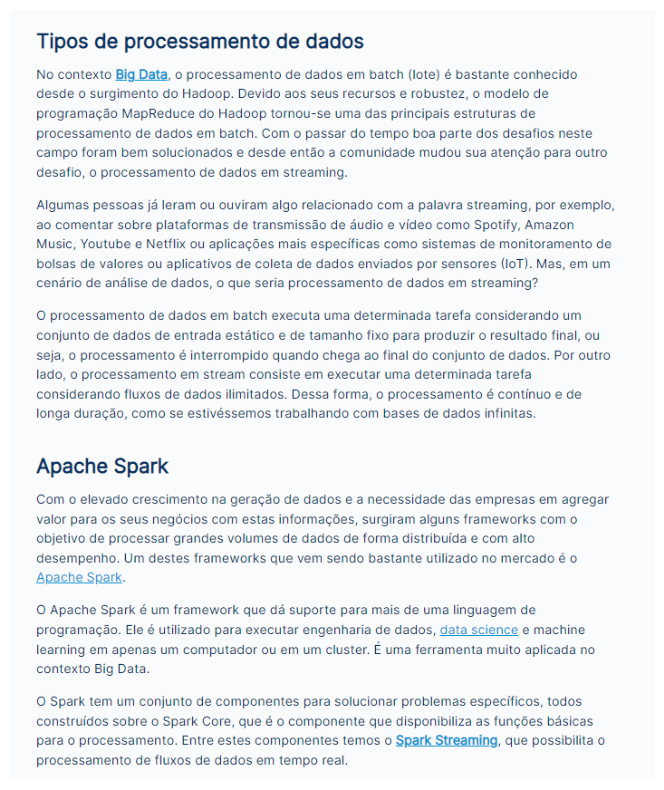

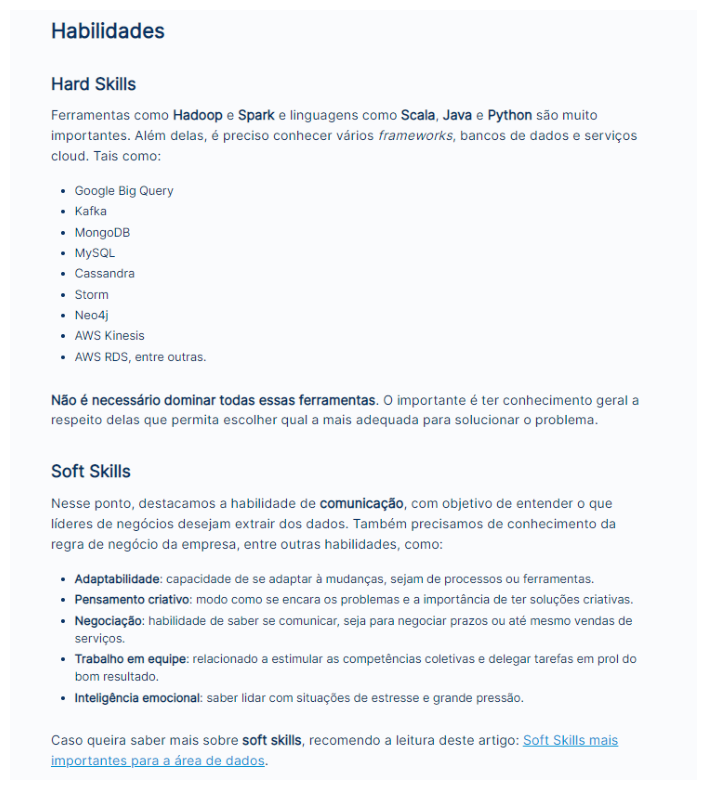

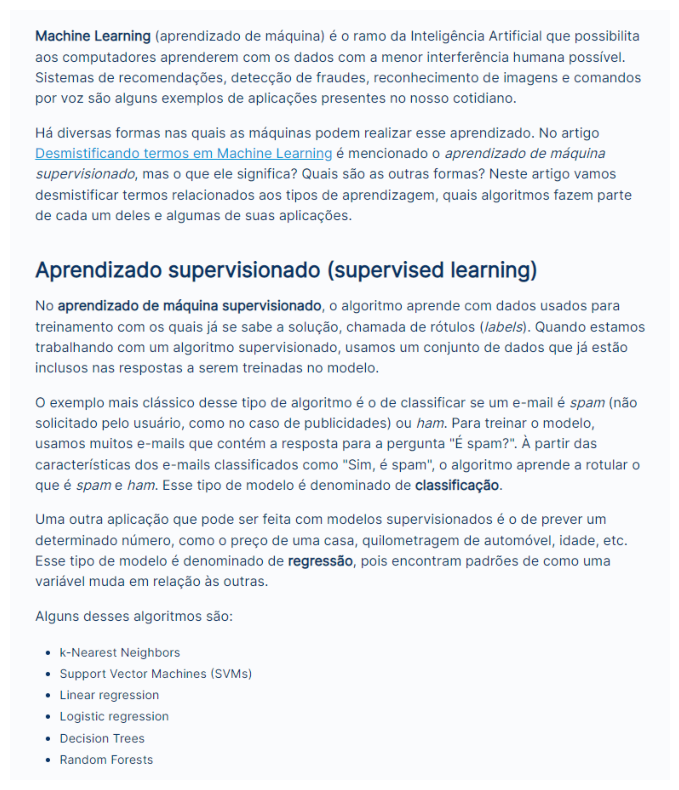

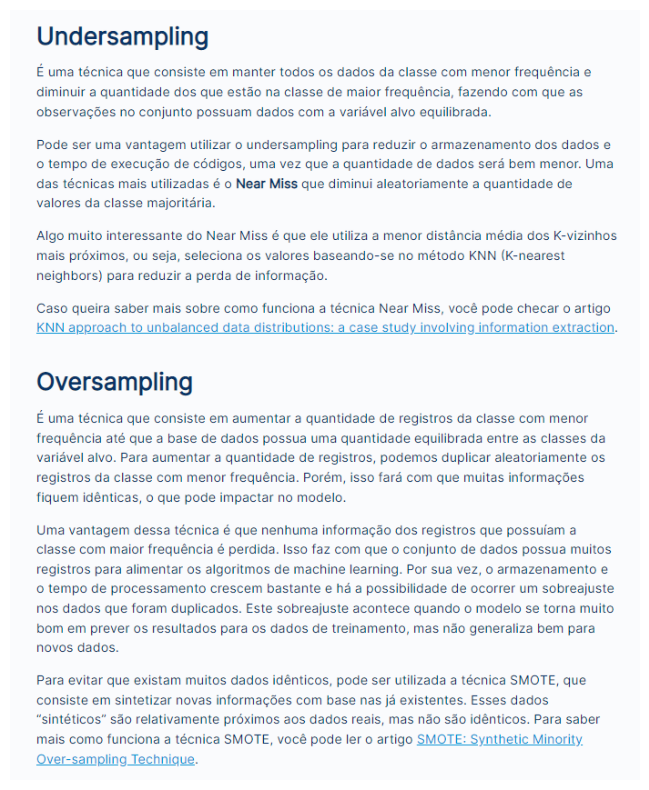

In [8]:
for image in path:
  image = cv2.imread(image)
  display(image)

In [9]:
# Armazena o diretório para os dados treinados
config_tesseract = '--tessdata-dir tessdata'

def OCR_process(img, config_tesseract):
  text = pytesseract.image_to_string(img, lang='por', config=config_tesseract)
  return text


# Reconhecimento de texto

In [10]:
full_txt = "" # Variável responsável por armazenar os textos concatenados
txt_name = 'result_ocr.txt' # Variável responsável por armazenar o nome do arquivo txt que irá guardar os textos

In [11]:
# Extrair e armazenar os textos
for image in path:
  img = cv2.imread(image)
  image_name = os.path.split(image)[-1] # Recebe os nomes e diretórios das imagens, quebrando, necessita somente da última posição (-1)

  division = '**************\n' + str(image_name) # Separa os textos com o nome

  full_txt = full_txt + division + '\n' # Recebe o texto, a divisão com o nome e por fim pula para a linha seguinte

  text = OCR_process(img, config_tesseract) # Passa a imagem que deve extrair o texto

  full_txt = full_txt + text # Concatena os dois textos


In [12]:
full_txt

'**************\nartigo-spark.png\nTipos de processamento de dados\n\nNo contexto Big Data, o processamento de dados em batch (lote) é bastante conhecido\ndesde o surgimento do Hadoop. Devido aos seus recursos e robustez, o modelo de\nprogramação MapReduce do Hadoop tornou-se uma das principais estruturas de\nprocessamento de dados em batch. Com o passar do tempo boa parte dos desafios neste\ncampo foram bem solucionados e desde então a comunidade mudou sua atenção para outro\ndesafio, o processamento de dados em streaming.\n\nAlgumas pessoas já leram ou ouviram algo relacionado com a palavra streaming, por exemplo,\nao comentar sobre plataformas de transmissão de áudio e vídeo como Spotify, Amazon\nMusic, Youtube e Netflix ou aplicações mais específicas como sistemas de monitoramento de\nbolsas de valores ou aplicativos de coleta de dados enviados por sensores (loT). Mas, em um\ncenário de análise de dados, o que seria processamento de dados em streaming?\n\nO processamento de dados e

In [13]:
# Salva o texto em um arquivo .txt
file_txt = open(txt_name, '+w') # Abre o arquivo result_ocr.txt
file_txt.write(full_txt + '\n') # Grava o texto no arquivo
file_txt.close()

# Busca de ocorrências

## Nos textos

In [14]:
search = 'learning'

In [15]:
with open(txt_name) as f:
  cases = [i.start() for i in re.finditer(search, f.read())] # Transforma os casos em que o termo pesquisado aparece em uma lista
  # Começa em i e utiliza o módulo .finditer da biblioteca re para buscar a posição do termo dentro do arquivo
  # os parâmetros do módulo são, respectivamente, o termo pesquisado (search) e a leitura do arquivo

In [16]:
cases

[1983, 4617, 7470]

## Na listagem de imagens

In [17]:
for image in path:
  img = cv2.imread(image) # Carrega a imagem
  image_name = os.path.split(image)[-1] # Recebe os nomes e diretórios das imagens, quebrando, necessita somente da última posição (-1)
  print("**********************************\n" + str(image_name))

  text = OCR_process(img, config_tesseract) # Usando o OCR

  cases = [i.start() for i in re.finditer(search, text)]

  print(f'Frequência de casos para o termo: {search} | {len(cases)}')

  print('\n')

**********************************
artigo-spark.png
Frequência de casos para o termo: learning | 1


**********************************
artigo-eng-dados.png
Frequência de casos para o termo: learning | 0


**********************************
artigo-termos-ML.png
Frequência de casos para o termo: learning | 1


**********************************
artigo-desbalanceamento.png
Frequência de casos para o termo: learning | 1




# Reconhecimento na imagem

In [32]:
font_dir = '/content/text-recognize/Imagens/calibri.ttf'

In [52]:
def WriteText(txt, x, y, img, font_dir, color=(50,100,255), size=16):
  fonte = ImageFont.truetype(font_dir, size)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - size), txt, font=fonte, fill=color)
  img = np.array(img_pil)

  return img

In [34]:
min_conf = 30 #@param {type: "slider", min: 0, max: 100}

In [35]:
def BoundingBox(i, result, img, color = (255, 100, 0)):
  x = result['left'][i]   # Pega o ponto inicial da palavra na esquerda
  y = result['top'][i]    # Pega o ponto inicial da palavra no topo
  w = result['width'][i]  # Pega a largura da palavra
  h = result['height'][i] # Pega a altura da palavra

  # Cria um retangulo na imagem nos pontos iniciais x e y
  # até o ponto máximo da largura (x+w) e altura (y+h) da palavra
  cv2.rectangle(img, (x,y), (x+w,y+h), color, 2)

  return x, y, img

In [44]:
def OCR_process_image(img, searching, config_tesseract, min_conf):
  result = pytesseract.image_to_data(img, config=config_tesseract, lang='por', output_type=Output.DICT) # Transforma a imagem em dados no formato de dicionário
  num_search = 0 # Frequência do termo pesquisado

  for i in range(0, len(result['text'])): # Percorre de 0 ao tamanho do valor máximo do texto
    confidence = int(result['conf'][i]) # Armazena a confiança da detecção

    if confidence > min_conf: # Se a confiança for maior que o mínimo
      text = result['text'][i] # O texto será igual ao resultado text no indíce i

      if searching.upper() in text.upper(): # Se o termo pesquisado estiver no texto
        x, y, img = BoundingBox(i, result, img, (0,0,255)) # Cria a caixa demilitadora (bounding box)
        img = WriteText(text, x, y, img, font_dir, (50, 100, 255), 14) # Escreve o texto em cima da caixa

        num_search += 1 # Adiciona um a frequência que o termo aparece

  return img, num_search


In [53]:
os.makedirs("images_project", exist_ok=True)

**********************************
artigo-spark.png
Frequência de casos para o termo: learning | 1


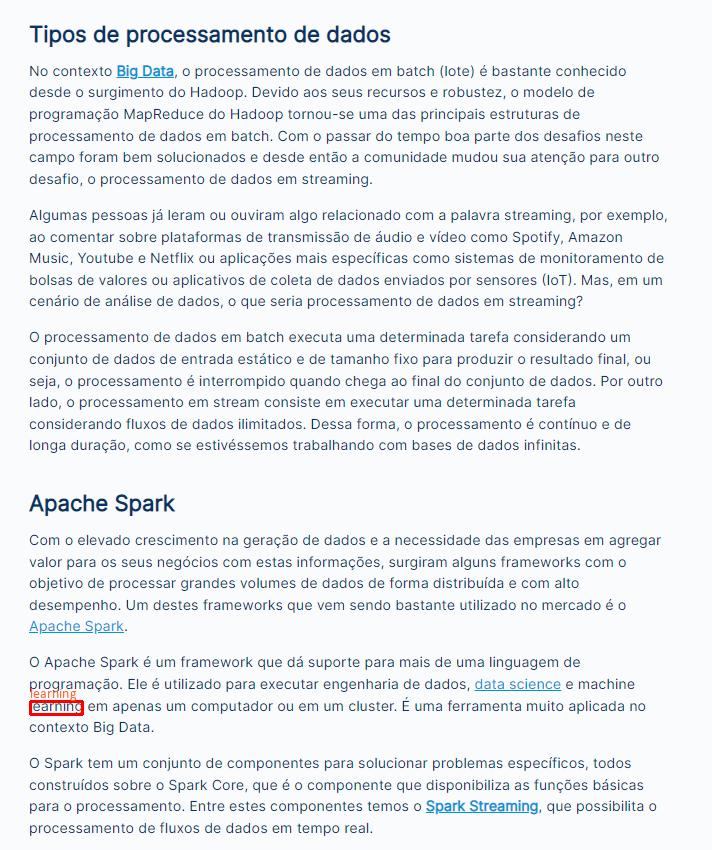

**********************************
artigo-eng-dados.png
Frequência de casos para o termo: learning | 0
**********************************
artigo-termos-ML.png
Frequência de casos para o termo: learning | 3


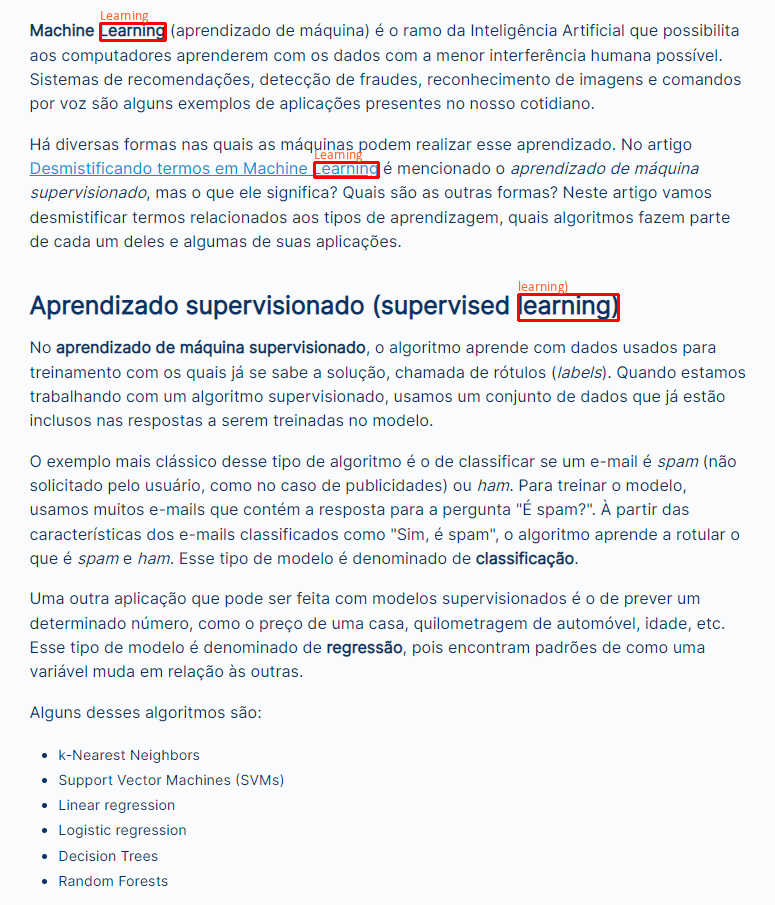

**********************************
artigo-desbalanceamento.png
Frequência de casos para o termo: learning | 1


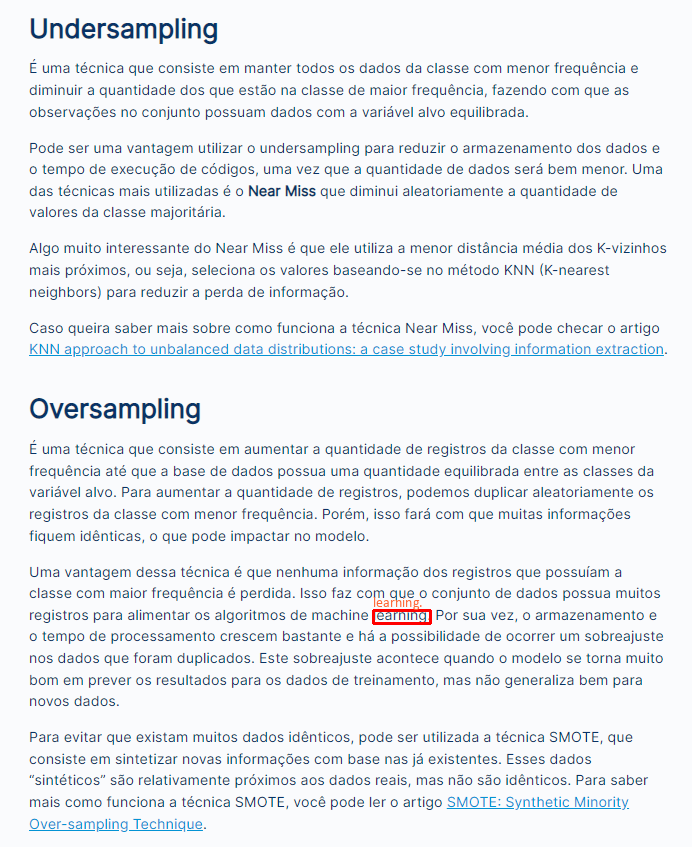

In [55]:
search = 'learning'

for image in path:
  img = cv2.imread(image) # Carrega a imagem
  img_original = img.copy() # Cria uma cópia da imagem original para tratamento

  image_name = os.path.split(image)[-1]
  print("**********************************\n" + str(image_name))

  img, num_search = OCR_process_image(img, search, config_tesseract, min_conf)
  print(f'Frequência de casos para o termo: {search} | {num_search}')

  if num_search > 0:
    cv2_imshow(img)
    new_image_name = "OCR_" + image_name
    new_image = "images_project/" + str(new_image_name)
    cv2.imwrite(new_image, img)